### PROBLEMA A RESOLVER
Determinar en base a qué parametros una canción es más probable a convertirse en un exito

### EDA

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from pydotplus import graph_from_dot_data
import graphviz

In [ ]:
# se crean los dataframes con los archivos .csv
df_80s = pd.read_csv("/datasets/datasets-spotify/dataset-of-80s.csv")
df_70s = pd.read_csv('/datasets/datasets-spotify/dataset-of-70s.csv')
df_90s = pd.read_csv('/datasets/datasets-spotify/dataset-of-90s.csv')
df_00s = pd.read_csv('/datasets/datasets-spotify/dataset-of-00s.csv')
df_10s = pd.read_csv('/datasets/datasets-spotify/dataset-of-10s.csv')

# agregamos la columna de la decada
df_80s['decade'] = '80s'
df_70s['decade'] = '70s'
df_90s['decade'] = '90s'
df_00s['decade'] = '00s'
df_10s['decade'] = '10s'

In [ ]:
# cantidad de registros de los dataframes

df_70s.shape # 7766
df_80s.shape  # 6908
df_90s.shape # 5520
df_00s.shape # 5872
df_10s.shape # 6398


(6398, 20)

In [ ]:
df_general = pd.concat([df_70s,df_80s,df_90s, df_00s, df_10s])

In [ ]:
df_general_hits = df_general.loc[df_general['target']==1, :]

In [ ]:
df_general_no_hits = df_general.loc[df_general['target']==0, :]

In [ ]:
df_general['target'].value_counts()

0    16232
1    16232
Name: target, dtype: int64

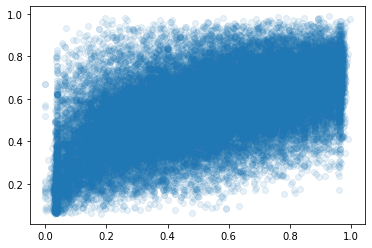

In [ ]:
# scatterplot todas las decadas
x = df_general['valence']
y = df_general['danceability']
plt.scatter(x,y,alpha=0.1,)

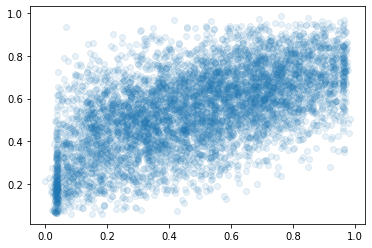

In [ ]:
# scatterplot decada 2000
x = df_general.loc[df_general['decade']=='00s',['valence']]
y = df_general.loc[df_general['decade']=='00s',['danceability']]
plt.scatter(x,y,alpha=0.1)

In [ ]:
#columnas de los datasets
df_general.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'decade'],
      dtype='object')

In [ ]:
#tipos de los datos en los dataframes
df_general.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
decade               object
dtype: object

danceability: qué tan facil de bailar es una canción

energy: qué tan energética es una canción

loudness: qué tanto volumen en decibeles tiene una canción

speechiness: qué tanto una canción está centrada en la parte hablada

acousticness: qué tan probable es que una canción se haya grabado con instrumentos acústicos

instrumentalness: qué tan instrumental es una canción

liveness: qué tan probable es que una canción sea una grabación en vivo

valence: positividad de una canción o estado de ánimo

tempo: tempo de la canción medido en beats por minuto - bpm

duration_ms: duración de la canción en milisegundos

time_signature: (compás) cuántos tiempos hay en cada compás de la canción

sections: la cantidad de variaciones en la estructura de una canción

target: si una canción fue un éxito en reproducciones (1) o no (0)


In [ ]:
# análisis / imputación de valores nulos
# se ven los valores nulos 
df_10s.isnull().sum() # no hay valores nulos 

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

<AxesSubplot:>

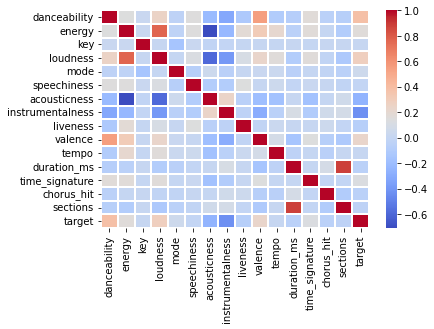

In [ ]:
#relación entre las variables
sns.heatmap(round(df_general.corr(),2),fmt='.2f',linewidths=2, cmap="coolwarm",)

Observamos que los parámetros que tienen mayor correlación positiva con target son: danceability, loudness y valence. Mientras que instrumentalness es el parametro con mayor correlación negativa.

Buscando correlaciones

Analizando la bailabilidad

In [ ]:
df_general_hits['danceability'].mean()
#los hits tienen una media de 0.64 de bailabilidad (dentro de los hits hay más canciones bailables)

0.620045946278955

In [ ]:
df_general_no_hits['danceability'].mean()

0.4846470551996057

(array([   5.,   27.,   81.,  204.,  317.,  495.,  798., 1092., 1513.,
        1955., 2147., 2112., 1977., 1470., 1023.,  623.,  300.,   93.]),
 array([0.0908    , 0.14064444, 0.19048889, 0.24033333, 0.29017778,
        0.34002222, 0.38986667, 0.43971111, 0.48955556, 0.5394    ,
        0.58924444, 0.63908889, 0.68893333, 0.73877778, 0.78862222,
        0.83846667, 0.88831111, 0.93815556, 0.988     ]),
 <BarContainer object of 18 artists>)

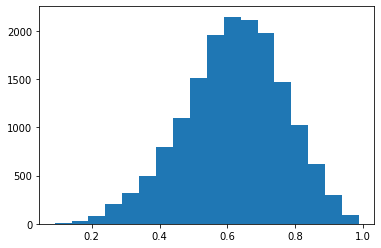

In [ ]:
plt.hist(df_general_hits['danceability'], bins = 18)

(array([ 212.,  368.,  764.,  839.,  980., 1267., 1332., 1574., 1686.,
        1670., 1532., 1343., 1008.,  710.,  503.,  295.,  113.,   36.]),
 array([0.0576    , 0.10873333, 0.15986667, 0.211     , 0.26213333,
        0.31326667, 0.3644    , 0.41553333, 0.46666667, 0.5178    ,
        0.56893333, 0.62006667, 0.6712    , 0.72233333, 0.77346667,
        0.8246    , 0.87573333, 0.92686667, 0.978     ]),
 <BarContainer object of 18 artists>)

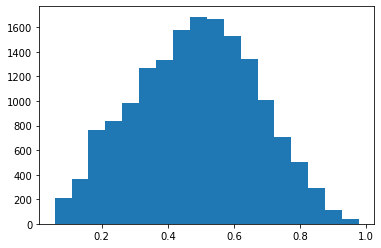

In [ ]:
plt.hist(df_general_no_hits['danceability'], bins = 18)

In [ ]:
df_general_hits['danceability'].value_counts(bins = 5)

(0.629, 0.809]                 6469
(0.45, 0.629]                  6082
(0.27, 0.45]                   1893
(0.809, 0.988]                 1560
(0.08889999999999999, 0.27]     228
Name: danceability, dtype: int64

La mayoría de éxitos tienen una bailabilidad que va desde 0.629 a 0.809 (bailabilidad alta)

In [ ]:
df_general_no_hits['danceability'].value_counts(bins = 5)

(0.426, 0.61]      5870
(0.242, 0.426]     4226
(0.61, 0.794]      3601
(0.0557, 0.242]    1820
(0.794, 0.978]      715
Name: danceability, dtype: int64

Las canciones no hits tienen una bailabilidad menor

(array([  24.,   30.,   85.,  166.,  299.,  466.,  654.,  941., 1049.,
        1306., 1387., 1607., 1743., 1636., 1718., 1485., 1161.,  475.]),
 array([0.0204    , 0.07465556, 0.12891111, 0.18316667, 0.23742222,
        0.29167778, 0.34593333, 0.40018889, 0.45444444, 0.5087    ,
        0.56295556, 0.61721111, 0.67146667, 0.72572222, 0.77997778,
        0.83423333, 0.88848889, 0.94274444, 0.997     ]),
 <BarContainer object of 18 artists>)

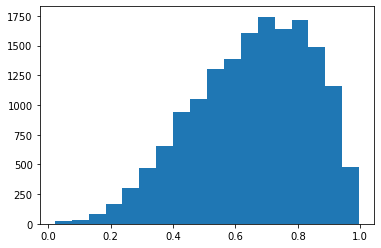

In [ ]:
x = df_general_hits['energy']

plt.hist(x, bins = 18)






Los hits tienen una energía entre 0,6 y 0,8

(array([ 668.,  580.,  601.,  666.,  697.,  767.,  790.,  830.,  960.,
         836.,  894.,  884.,  926.,  929.,  912., 1105., 1429., 1758.]),
 array([2.51000000e-04, 5.57926111e-02, 1.11334222e-01, 1.66875833e-01,
        2.22417444e-01, 2.77959056e-01, 3.33500667e-01, 3.89042278e-01,
        4.44583889e-01, 5.00125500e-01, 5.55667111e-01, 6.11208722e-01,
        6.66750333e-01, 7.22291944e-01, 7.77833556e-01, 8.33375167e-01,
        8.88916778e-01, 9.44458389e-01, 1.00000000e+00]),
 <BarContainer object of 18 artists>)

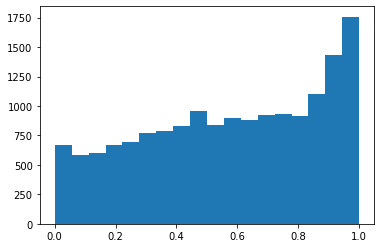

In [ ]:
x = df_general_no_hits['energy']

plt.hist(x, bins = 18)

Los&nbsp;no&nbsp;hits&nbsp;tienen&nbsp;energía&nbsp;entre&nbsp;0,8&nbsp;y&nbsp;1

Análisis de la valencia

(array([ 119.,  272.,  486.,  614.,  795.,  808.,  909.,  920.,  970.,
        1142., 1164., 1195., 1216., 1271., 1163., 1111., 1074., 1003.]),
 array([0.0352    , 0.08824444, 0.14128889, 0.19433333, 0.24737778,
        0.30042222, 0.35346667, 0.40651111, 0.45955556, 0.5126    ,
        0.56564444, 0.61868889, 0.67173333, 0.72477778, 0.77782222,
        0.83086667, 0.88391111, 0.93695556, 0.99      ]),
 <BarContainer object of 18 artists>)

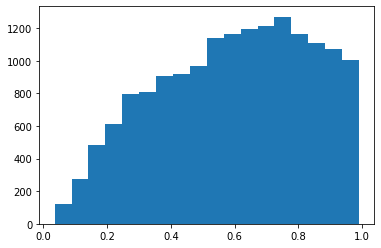

In [ ]:
x = df_general_hits['valence']

plt.hist(x, bins = 18)

(array([1049.,  942.,  919.,  950.,  926.,  939., 1009.,  982.,  955.,
        1027.,  931.,  883.,  918.,  872.,  792.,  746.,  739.,  653.]),
 array([0.        , 0.05533333, 0.11066667, 0.166     , 0.22133333,
        0.27666667, 0.332     , 0.38733333, 0.44266667, 0.498     ,
        0.55333333, 0.60866667, 0.664     , 0.71933333, 0.77466667,
        0.83      , 0.88533333, 0.94066667, 0.996     ]),
 <BarContainer object of 18 artists>)

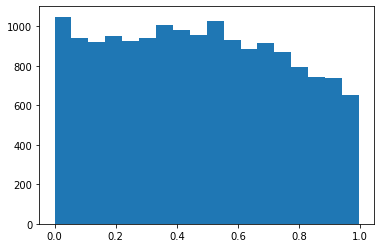

In [ ]:
x = df_general_no_hits['valence']

plt.hist(x, bins = 18)

Análisis del volumen

(array([   7.,    5.,    9.,   24.,   58.,  160.,  304.,  615.,  979.,
        1307., 1623., 1925., 2336., 2736., 2485., 1394.,  240.,   20.]),
 array([-25.        , -23.61111111, -22.22222222, -20.83333333,
        -19.44444444, -18.05555556, -16.66666667, -15.27777778,
        -13.88888889, -12.5       , -11.11111111,  -9.72222222,
         -8.33333333,  -6.94444444,  -5.55555556,  -4.16666667,
         -2.77777778,  -1.38888889,   0.        ]),
 <BarContainer object of 18 artists>)

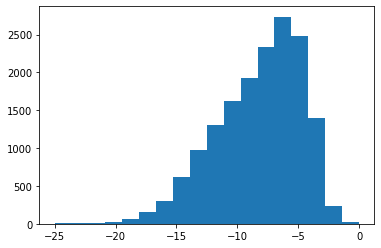

In [ ]:
plt.hist(df_general_hits['loudness'], bins = 18, range = [-25,0])

(array([ 172.,  249.,  265.,  338.,  432.,  584.,  768.,  994., 1162.,
        1385., 1423., 1591., 1810., 1738., 1579.,  873.,  213.,   35.]),
 array([-25.        , -23.61111111, -22.22222222, -20.83333333,
        -19.44444444, -18.05555556, -16.66666667, -15.27777778,
        -13.88888889, -12.5       , -11.11111111,  -9.72222222,
         -8.33333333,  -6.94444444,  -5.55555556,  -4.16666667,
         -2.77777778,  -1.38888889,   0.        ]),
 <BarContainer object of 18 artists>)

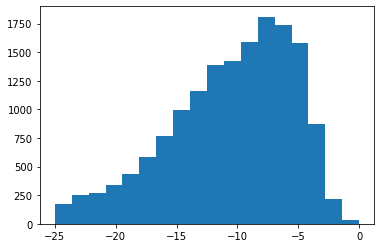

In [ ]:
plt.hist(df_general_no_hits['loudness'], bins = 18, range = [-25,0])

In [ ]:
df_general['loudness'].mean()

-9.740177488910792

Tienen volumenes parecidos pero los no hits llegan a volumenes bajos

Analisis del tempo

(array([1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 5.000e+00, 3.000e+01,
        5.300e+01, 9.500e+01, 3.520e+02, 5.380e+02, 4.870e+02, 6.380e+02,
        8.770e+02, 1.124e+03, 7.780e+02, 8.830e+02, 9.410e+02, 1.042e+03,
        1.246e+03, 1.180e+03, 1.109e+03, 8.170e+02, 7.380e+02, 5.790e+02,
        4.290e+02, 3.680e+02, 2.370e+02, 2.850e+02, 2.280e+02, 3.210e+02,
        2.600e+02, 1.730e+02, 1.100e+02, 8.900e+01, 5.300e+01, 2.700e+01,
        7.800e+01, 5.100e+01, 7.000e+00, 1.000e+00]),
 array([ 37.114  ,  41.62105,  46.1281 ,  50.63515,  55.1422 ,  59.64925,
         64.1563 ,  68.66335,  73.1704 ,  77.67745,  82.1845 ,  86.69155,
         91.1986 ,  95.70565, 100.2127 , 104.71975, 109.2268 , 113.73385,
        118.2409 , 122.74795, 127.255  , 131.76205, 136.2691 , 140.77615,
        145.2832 , 149.79025, 154.2973 , 158.80435, 163.3114 , 167.81845,
        172.3255 , 176.83255, 181.3396 , 185.84665, 190.3537 , 194.86075,
        199.3678 , 203.87485, 208.3819 , 212.88895, 217.39

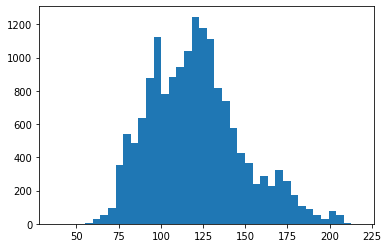

In [ ]:
plt.hist(df_general_hits['tempo'], bins = 40)


(array([4.000e+00, 1.000e+00, 2.100e+01, 1.700e+01, 4.400e+01, 1.210e+02,
        2.220e+02, 3.690e+02, 7.070e+02, 7.100e+02, 7.350e+02, 1.068e+03,
        1.019e+03, 9.070e+02, 1.028e+03, 9.370e+02, 1.099e+03, 1.011e+03,
        1.052e+03, 8.740e+02, 8.280e+02, 5.800e+02, 4.800e+02, 3.470e+02,
        3.400e+02, 3.280e+02, 4.240e+02, 3.140e+02, 2.710e+02, 1.380e+02,
        6.600e+01, 6.700e+01, 6.900e+01, 2.500e+01, 6.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 34.535 ,  39.7072,  44.8794,  50.0516,  55.2238,  60.396 ,
         65.5682,  70.7404,  75.9126,  81.0848,  86.257 ,  91.4292,
         96.6014, 101.7736, 106.9458, 112.118 , 117.2902, 122.4624,
        127.6346, 132.8068, 137.979 , 143.1512, 148.3234, 153.4956,
        158.6678, 163.84  , 169.0122, 174.1844, 179.3566, 184.5288,
        189.701 , 194.8732, 200.0454, 205.2176, 210.3898, 215.562 ,
        220.7342, 225.9064, 231.0786, 236.2508, 241.423 ]),
 <BarContainer object of 40 artist

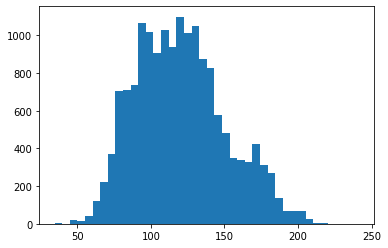

In [ ]:
plt.hist(df_general_no_hits['tempo'], bins = 40)

In [ ]:
df_general_hits['tempo'].mean()
#las canciones que se convierten en éxitos tienen de media un tempo de 120.6 bpm 

120.69971968950222

In [ ]:
df_general_hits['tempo'].median()
#las canciones que se convierten en éxitos tienen una mediana de 119.6 bpm en el tempo 

119.593

In [ ]:
df_general['tempo'].describe()

count    32464.000000
mean       120.459754
std         28.966311
min         34.535000
25%         98.370500
50%        119.044000
75%        137.949000
max        241.423000
Name: tempo, dtype: float64

In [ ]:
df_general_hits['tempo'].value_counts(bins = 5)

(109.227, 145.283]    7652
(73.17, 109.227]      5677
(145.283, 181.34]     2301
(181.34, 217.396]      416
(36.933, 73.17]        186
Name: tempo, dtype: int64

In [ ]:
df_general_no_hits['tempo'].value_counts(bins = 5)

(75.913, 117.29]                7111
(117.29, 158.668]               6271
(158.668, 200.045]              1948
(34.327000000000005, 75.913]     799
(200.045, 241.423]               103
Name: tempo, dtype: int64

La mayoría de canciones exitosas se encuentran en un rango de ??? pero su exito dependerá de más factores

Análisis de otrass variables

## Secciones

(array([2.0200e+02, 1.0585e+04, 5.1410e+03, 2.7100e+02, 2.4000e+01,
        4.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <BarContainer object of 10 artists>)

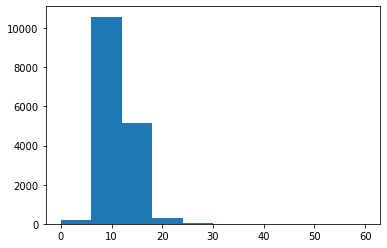

In [ ]:
plt.hist(df_general_hits['sections'], range = [0,60])

(array([1304., 9149., 4450.,  828.,  257.,  110.,   36.,   31.,   22.,
          16.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <BarContainer object of 10 artists>)

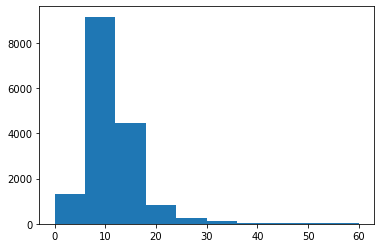

In [ ]:
plt.hist(df_general_no_hits['sections'],range [0,60])

## Duración

In [ ]:
#convertimos la duración en milisegunos a segundos
df_general_hits['duration_s'] = (df_general_hits['duration_ms'] / 1000)


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
hits_duration_mean_s = df_general_hits['duration_s'].mean()
hits_duration_mean_s

242.17782257269593

In [ ]:
m1= hits_duration_mean_s // 60
segundos = hits_duration_mean_s % 60
minutos = m1 % 60
print("Un hit tiene de media una duración de: ", int(minutos), "minutos y ", int(segundos), " segundos")

Un hit tiene de media una duración de:  4 minutos y  2  segundos


In [ ]:
df_general_no_hits['duration_s'] = (df_general_no_hits['duration_ms'] / 1000)
no_hits_duration_mean_s = df_general_no_hits['duration_s'].mean()
m2= no_hits_duration_mean_s // 60
segundos2 = no_hits_duration_mean_s % 60
minutos2 = m2 % 60
print("Un no hit tiene de media una duración de: ", int(minutos2), "minutos y ", int(segundos2), " segundos")

Un no hit tiene de media una duración de:  4 minutos y  14  segundos
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([ 192., 1085.,  706.,  295.,  219.,  152.,  201.,  117.,   57.,
          27.,   32.,   21.,   31.,   18.,   10.,    8.,    9.,    5.,
           3.,   11.]),
 array([0.0167  , 0.064815, 0.11293 , 0.161045, 0.20916 , 0.257275,
        0.30539 , 0.353505, 0.40162 , 0.449735, 0.49785 , 0.545965,
        0.59408 , 0.642195, 0.69031 , 0.738425, 0.78654 , 0.834655,
        0.88277 , 0.930885, 0.979   ]),
 <BarContainer object of 20 artists>)

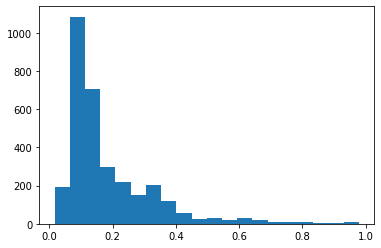

In [ ]:
plt.hist(df_['liveness'], bins= 20)


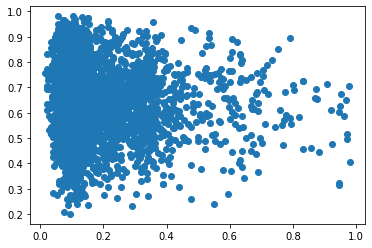

In [ ]:
x = hits_10s['liveness']
plt.scatter(x,y)

Las canciones grabadas en vivo tienen menos probabilidad de convertirse en un hit y son menos bailables

(array([2136.,  402.,  209.,  200.,  143.,   70.,   28.,    5.,    3.,
           3.]),
 array([0.0225 , 0.09355, 0.1646 , 0.23565, 0.3067 , 0.37775, 0.4488 ,
        0.51985, 0.5909 , 0.66195, 0.733  ]),
 <BarContainer object of 10 artists>)

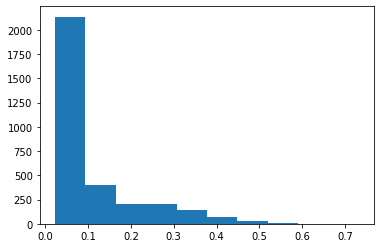

In [ ]:
x = hits_10s['speechiness']
plt.hist(x) 

La mayoría de hits no están centrados en partes "habladas"

Buscamos la duración adecuada para un hit 

(array([  5.,   5.,  16.,  49., 119., 312., 689., 807., 581., 281., 158.,
         84.,  32.,  28.,  12.,   5.,   2.,   6.,   2.,   1.,   1.,   0.,
          2.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 59.387     ,  80.35586667, 101.32473333, 122.2936    ,
        143.26246667, 164.23133333, 185.2002    , 206.16906667,
        227.13793333, 248.1068    , 269.07566667, 290.04453333,
        311.0134    , 331.98226667, 352.95113333, 373.92      ,
        394.88886667, 415.85773333, 436.8266    , 457.79546667,
        478.76433333, 499.7332    , 520.70206667, 541.67093333,
        562.6398    , 583.60866667, 604.57753333, 625.5464    ,
        646.51526667, 667.48413333, 688.453     ]),
 <BarContainer object of 30 artists>)

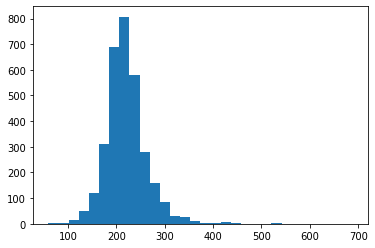

In [ ]:
x = hits_10s['duration_s']
plt.hist(x, bins = 30)

In [ ]:
#la media de duración de un hit es de 220 segundos
hits_10_duration_mean_s = x.mean()

(array([3.152e+03, 1.900e+01, 1.000e+01, 3.000e+00, 3.000e+00, 1.000e+00,
        4.000e+00, 3.000e+00, 2.000e+00, 2.000e+00]),
 array([0.    , 0.0961, 0.1922, 0.2883, 0.3844, 0.4805, 0.5766, 0.6727,
        0.7688, 0.8649, 0.961 ]),
 <BarContainer object of 10 artists>)

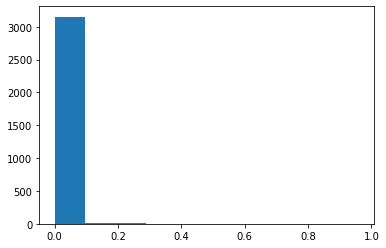

In [ ]:
x =  hits_10s['instrumentalness']

plt.hist(x)

Casi ningún hit tiene un nivel de speechiness mayor a 0.1 porque la mayoría son cantadas y tienen muy poca parte "hablada"

(array([[ 22.,  68., 163., 329., 551., 655., 630., 397., 245.,  92.],
        [  1.,   0.,   1.,   1.,   1.,   6.,   4.,   1.,   3.,   1.],
        [  0.,   0.,   0.,   1.,   2.,   1.,   5.,   0.,   1.,   0.],
        [  0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.],
        [  0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   0.],
        [  0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   1.,   0.,   0.,   0.,   2.,   0.,   1.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,   0.],
        [  0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.]]),
 array([0.    , 0.0961, 0.1922, 0.2883, 0.3844, 0.4805, 0.5766, 0.6727,
        0.7688, 0.8649, 0.961 ]),
 array([0.201, 0.279, 0.357, 0.435, 0.513, 0.591, 0.669, 0.747, 0.825,
        0.903, 0.981]),
 <matplotlib.collections.QuadMesh at 0x7f7005cfa490>)

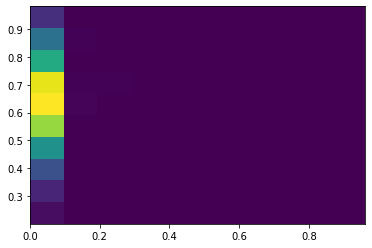

In [ ]:
plt.hist2d(x,y)

Las hits más bailables no son canciones tan instrumentales

In [ ]:
hits_10s['time_signature'].value_counts()

4    3042
3      94
5      54
1       9
Name: time_signature, dtype: int64

La mayoría de canciones tiene un time signature de 4/4

In [ ]:
hits_70s = df_70s.loc[df_70s['target'] == 1,:]
hits_80s = df_80s.loc[df_80s['target'] == 1,:]
hits_90s = df_90s.loc[df_90s['target'] == 1,:]
hits_00s = df_00s.loc[df_00s['target'] == 1,:]


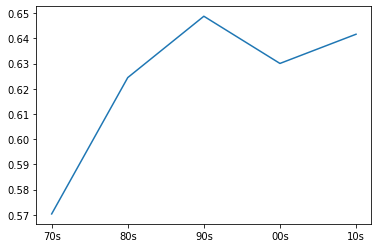

In [ ]:
media_dance70 = hits_70s['danceability'].mean()
media_dance80 = hits_80s['danceability'].mean()
media_dance90 = hits_90s['danceability'].mean()
media_dance00 = hits_00s['danceability'].mean()
media_dance10 = hits_10s['danceability'].mean()

y = [media_dance70,media_dance80, media_dance90, media_dance00, media_dance10]
x = ['70s','80s','90s','00s','10s']
plt.plot(x,y)

Text(0.5, 1.0, 'media de ruido de las canciones durante los años')

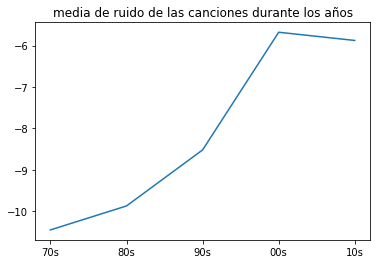

In [ ]:
media_dance70 = hits_70s['loudness'].mean()
media_dance80 = hits_80s['loudness'].mean()
media_dance90 = hits_90s['loudness'].mean()
media_dance00 = hits_00s['loudness'].mean()
media_dance10 = hits_10s['loudness'].mean()

y = [media_dance70,media_dance80, media_dance90, media_dance00, media_dance10]
x = ['70s','80s','90s','00s','10s']
plt.plot(x,y)
plt.title("media de ruido de las canciones durante los años")

Bloxpot y outliers(valores extremos)

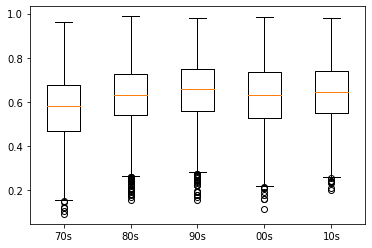

In [ ]:
#analizaremos la distribución de bailabilidad de los hits de las decadas de los 70s hasta los 2010s
a = [hits_70s['danceability'],hits_80s['danceability'],hits_90s['danceability'],hits_00s['danceability'],hits_10s['danceability']]

bp = plt.boxplot(a,labels = ['70s','80s','90s','00s','10s'])

# hay outliers más visibles en las canciones de las décadas de los 70s, 80s y 90s

La bailabilidad es el parámetro más correlacionado al éxito de una canción, pero también encontramos varios outliers, tomaremos el dataset de los "2010s" para encontrar los outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7f70025effd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7002675950>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f70025d2090>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7002675550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7002675e10>],
 'means': []}

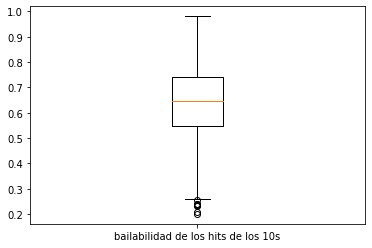

In [ ]:
a = [hits_10s['danceability']]
plt.boxplot(a,labels = ['bailabilidad de los hits de los 10s'])

#observamos outliers en el boxplot

Tomamos como outliers los valores que están debajo del whisker inferior

In [ ]:

hits_10s['danceability'].describe() # obtenemos como Q1(primer cuartil):0.547 y como Q3(tercer quartil): 0.741 en el boxplot
iqr00 = 0.741 - 0.547 # rango entre cuartiles
whisker_bot = 0.547 - (1.5 * iqr00) # whisker inferior


hits_10s.loc[hits_10s['danceability'] < whisker_bot,['track','artist','danceability']] 

,track,artist,danceability
712,Everytime,Ariana Grande,0.239
725,Every Breath You Take,Hannah Huston,0.237
1108,It's The Most Wonderful Time Of The Year,Andy Williams,0.240
1274,Walk,Foo Fighters,0.231
2683,Already Gone,Kelly Clarkson,0.209
3414,I Dreamed A Dream,Anne Hathaway,0.256
3901,Video Games,Lana Del Rey,0.236
5180,Forever Country,"Artists Of Then, Now & Forever",0.201


# Baseline

Para determinar si una canción será o no un éxito encontramos que los parametros que están más correlacionadas con el éxito de una canción son la bailabilidad, la valencia y el volumen 


Las canciones exitosa en reproducciones generalmente tienen una bailabilidad alta, en el dataset que analizamos (df_10s) obutvimos un promedio de 0.64 en bailabilidad por lo que en nuestro modelo la bailabilidad tendrá un peso importante favoreciendo a las canciones que tengan más alto este parametro o más cercano a la media. La bailabilidad se encuentra relacionada con la valencia o estado de ánimo de una canción, si bien existen hits que son canciones tristes, la mayoría tiene una valencia alta. En el caso de loudness, el volumen promedio está alrededor de -5.87 dB, aunque varía de acuerdo al género de la canción hay un estandar en la industria musical



Con respecto a las demás variables encontramos las siguientes observaciones:

1. Instrumental, speechiness y liveness en los hits tienen un valor muy bajo, es decir las canciones tienen que ser menos instrumentales, más centradas en la voz cantada y no ser grabaciones en vivo
2. las canciones tienen que tener una duración media de 3 minutos y 40 segundos
3. las canciones más populares tienen un time signature de 4/4 porque son canciones más bailables






In [ ]:
def predict_baseline(bailabilidad, valencia, loudness, decade):
    



In [ ]:
train_cols = ['danceability', 'energy',
       'speechiness', 'acousticness', 'instrumentalness',
       'valence', 'tempo', 'duration_ms', 'time_signature',
       'sections']
       #,  'decade', 'liveness', 'chorus_hit', 'loudness'
X = df_general[train_cols]
y = df_general['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5, random_state=42)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

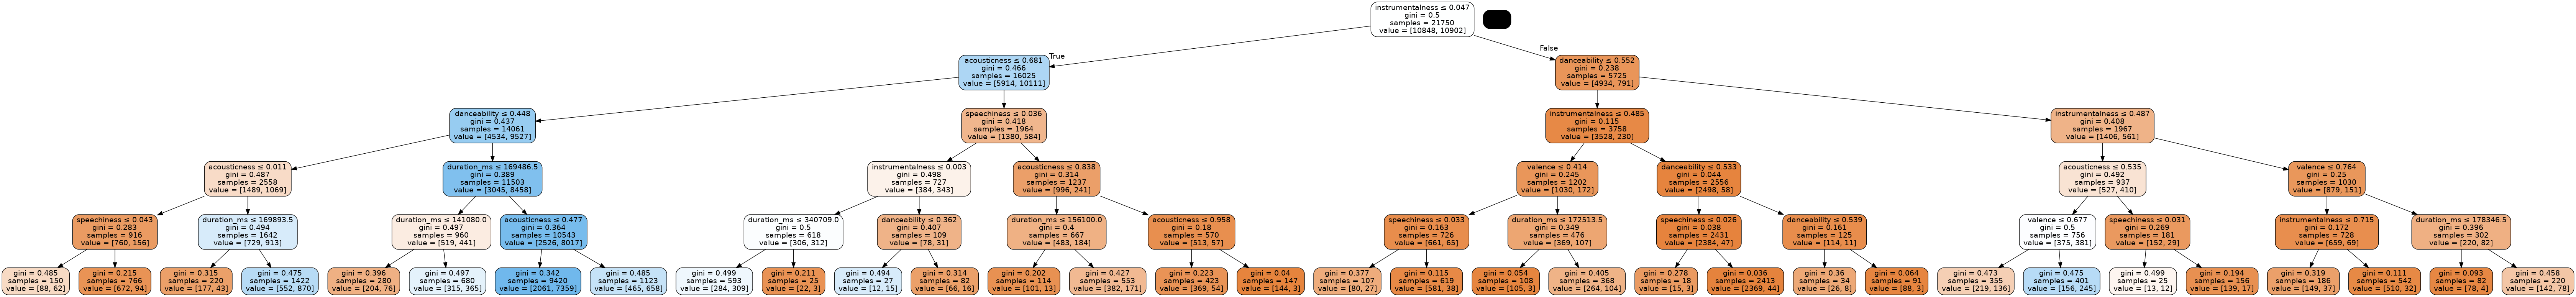

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
# Visualizar el árbol usando graphviz
dot_data = export_graphviz(dtc, out_file=None,  
                feature_names=X.columns,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3b4d89a2-8052-4b43-b8cd-618ee4c0c558' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>